# Data Loading

In [12]:
import pandas as pd

new_df = pd.read_csv('database/output.csv', index_col=0)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 7ro0hRteUMfnOioTFI5TG1 to 3qLPnTQYkTObObPgncJQyS
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   songTitle         897 non-null    object 
 1   SongArtistTitle   897 non-null    object 
 2   popularity        897 non-null    int64  
 3   danceability      897 non-null    float64
 4   energy            897 non-null    float64
 5   key               897 non-null    int64  
 6   loudness          897 non-null    float64
 7   mode              897 non-null    int64  
 8   speechiness       897 non-null    float64
 9   acousticness      897 non-null    float64
 10  instrumentalness  897 non-null    float64
 11  liveness          897 non-null    float64
 12  valence           897 non-null    float64
 13  tempo             897 non-null    float64
 14  type              897 non-null    object 
 15  id                897 non-null    object 
 16  uri      

# Feature Extraction

The feature extraction of this project is unlike a regular machine learning problems. In this case, there is no "target value" which sets as a tuning parameter for the training phase.

Rather than comparing the effectiveness of the features in regards to the result (which in this case there are none), we will take the correlation between the values within of each feature space, and rank them in order, ranking them from the feature with the least variance.

With this in mind, the initial **assumption** is that user has this similarities in picking their songs inside their playlist. The features that share the least variance will be the main parameter to pick the song recommendation inside their **genre bubble**.

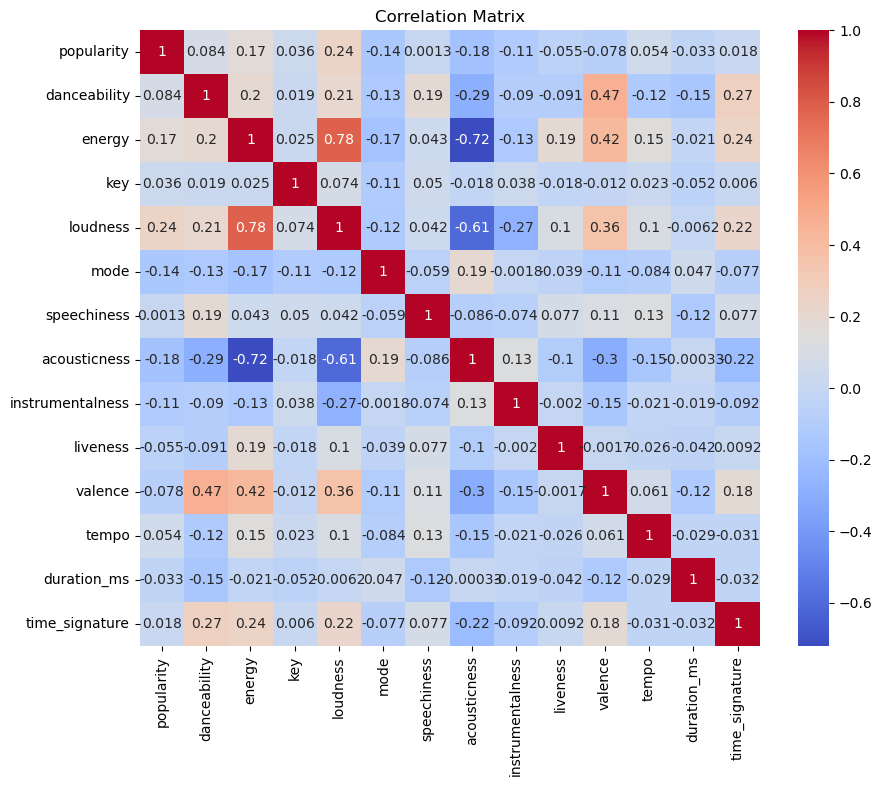

In [16]:
# Feature extraction using Correlation Matrix (Pearson)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the correlation matrix
correlation_matrix = new_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [96]:
# Song Genre Count
import re

genreDict = {}

for i in range(len(new_df)):
    _genres = new_df.iloc[i][1].replace("'", "").replace('[', '').replace(']', '')
    _genres = _genres.split(", ")

    for _genre in _genres:
        if _genre in genreDict:
            genreDict[_genre] += 1
        else:
            genreDict[_genre] = 1

print(genreDict)

{'reggaeton': 34, 'trap latino': 41, 'urbano latino': 40, 'pop': 370, 'r&b': 41, 'rap': 107, 'afrobeats': 17, 'nigerian pop': 11, 'post-teen pop': 7, 'conscious hip hop': 12, 'hip hop': 61, 'west coast rap': 5, 'bronx drill': 3, 'k-pop girl group': 6, 'canadian contemporary r&b': 33, 'canadian pop': 50, 'gen z singer-songwriter': 9, 'dfw rap': 10, 'melodic rap': 30, 'uk contemporary r&b': 3, 'uk pop': 58, 'new jersey rap': 1, 'corrido': 2, 'corridos tumbados': 1, 'nueva musica mexicana': 4, 'sad sierreno': 2, 'sierreno': 1, 'indie poptimism': 9, 'new jersey underground rap': 2, 'trap queen': 6, 'trap': 34, 'atl hip hop': 21, 'chicago drill': 2, 'chicago rap': 6, 'drill': 3, 'north carolina hip hop': 13, 'big room': 9, 'dance pop': 102, 'edm': 56, 'pop dance': 48, 'electro house': 18, 'house': 21, 'progressive house': 12, 'uk dance': 26, 'indietronica': 26, 'metropopolis': 7, 'modern indie pop': 9, 'pov: indie': 53, 'alt z': 40, 'r&b en espanol': 5, 'puerto rican pop': 10, 'boston folk'

<module 'matplotlib.pyplot' from '/Users/jr/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

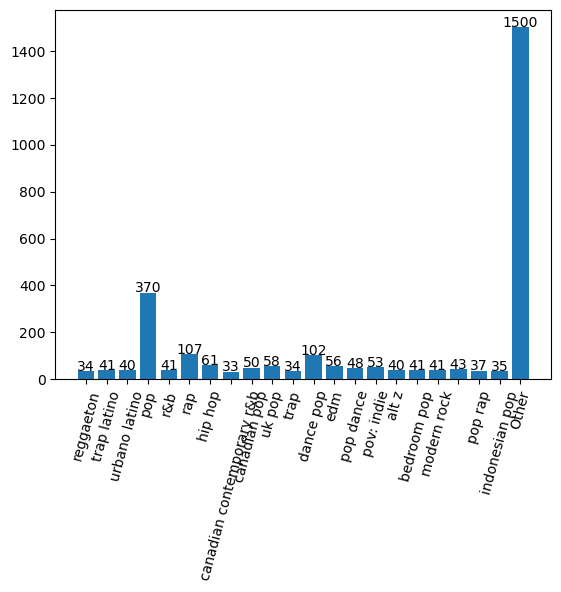

In [108]:
import matplotlib.pyplot as plt

# Assuming 'data' is your dictionary

# Filter the data to include values greater than 50 and sum up the remaining values
filtered_data = {key: value for key, value in genreDict.items() if value > 30}
other_value = sum(value for value in genreDict.values() if value <= 30)

# Add the "Other" category and its summed up value to the filtered data
filtered_data['Other'] = other_value

# Extract the filtered keys and values
categories = list(filtered_data.keys())
values = list(filtered_data.values())

# Create a bar chart
plt.bar(categories, values)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=85)

# Add count labels on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 2, str(v), ha='center')

# Set labels and title
plt


In [95]:
a = {'abby': 0}

if 'lisa' in a:
    a['lisa'] +=1
else:
    a['lisa'] = 1

a

{'abby': 0, 'lisa': 1}